In [2]:
import numpy as np
import os,sys
from PIL import Image
import six
import imagehash
import pandas as pd
import operator

In [2]:
def reduceimg(img):
    outfile = os.path.splitext(img)[0] + "_" + ".jpeg"
    try:
        # reduced image dimensions
        size = (8,8)
        img = Image.open(img)
        img = img.resize(size, Image.ANTIALIAS)
        return img
    except IOError:
        raise Exception("Bad File")

In [3]:
def greyscale(img):
    img = img.convert('1')
    return img

In [4]:
def average_colors(img):
    pixelWeight = list(img.getdata())
    listLen = len(pixelWeight)
    totalsum = 0
    counter = 0
    for i in range(listLen):
        totalsum += pixelWeight[i]
        counter += 1
    averageVal = totalsum/counter
    return averageVal

In [5]:
def compare_bits(img,imgAvg):
    pixelWeight = list(img.getdata())
    listLen = len(pixelWeight)
    assert(listLen==64)
    bitRes = ""
    for i in range(listLen):
        greyscale = rgb2grey(pixelWeight[i])
        if greyscale > imgAvg:
            bitRes += "1"
        else:
            bitRes += "0"
    return bitRes

In [6]:
def rgb2grey(rgbTuple):
    red = rgbTuple[0]
    green = rgbTuple[1]
    blue = rgbTuple[2]
    greyscale = 0.299*red + 0.587*green + 0.114*blue
    return greyscale

In [7]:
def hammingDifference(bitNum1, bitNum2):
    result = 0
    for index in range(len(bitNum1)):
        if (bitNum2[index]!=bitNum1[index]):
            result += 1
    return result

In [8]:
def PHASH_Value(img):
    img = reduceimg(img)
    greyImg = greyscale(img)
    imgAvg = average_colors(greyImg)
    bitHash = compare_bits(img,imgAvg)
    return bitHash

In [9]:
def PHASH(img1,img2):
    # reduces image, greyscales
    # averages and then hashes image
    #img1=Image.open(img1)
    img1 = reduceimg(img1)
    greyImg1 = greyscale(img1)
    imgAvg1 = average_colors(greyImg1)
    bitHash1 = compare_bits(img1,imgAvg1)

    #for image2
    #img2 = sys.argv[2]
    #img2=Image.open(img2)
    img2 = reduceimg(img2)
    greyImg2 = greyscale(img2)
    imgAvg2 = average_colors(greyImg2)
    bitHash2 = compare_bits(img2,imgAvg2)

    #computes difference in hashes
    dif = hammingDifference(bitHash1,bitHash2)

    #print results
    print()
    print("Img1's hash value is",(hex(eval(("0b" + bitHash1)))[2:]))
    print("Img2's hash value is",(hex(eval(("0b" + bitHash2)))[2:]))
    print("The hash difference is",dif)
    #isdifferent(dif)
    print()
    return

In [10]:
df_ajio=pd.read_csv('E:/Temp/Common_Ajio.csv')
df_ajio.drop_duplicates(subset = ["PDP Url"], inplace = True)
df_ajio

,#,P_JIOOCODE,IMAGE_URL,Brick Code,Selling Price,Brand,new_path,Pack Code,PDP Url
0,5664,425004494001,https://assets.ajio.com/b2b/medias/sys_master/...,830216014,369,YUKTH,F:\Common_Brand_Ajio\425004494001.jpg,480008304,https://ajiobusiness.com/storefront/ProductDet...
4,5674,425002298005,https://assets.ajio.com/b2b/medias/sys_master/...,830216014,272,YUKTH,F:\Common_Brand_Ajio\425002298005.jpg,480013495,https://ajiobusiness.com/storefront/ProductDet...
8,5678,425002302004,https://assets.ajio.com/b2b/medias/sys_master/...,830216014,369,YUKTH,F:\Common_Brand_Ajio\425002302004.jpg,480013500,https://ajiobusiness.com/storefront/ProductDet...
12,5682,425002293001,https://assets.ajio.com/b2b/medias/sys_master/...,830216014,242,YUKTH,F:\Common_Brand_Ajio\425002293001.jpg,480013487,https://ajiobusiness.com/storefront/ProductDet...
16,5686,425002299017,https://assets.ajio.com/b2b/medias/sys_master/...,830216014,277,YUKTH,F:\Common_Brand_Ajio\425002299017.jpg,480013492,https://ajiobusiness.com/storefront/ProductDet...
20,5690,425001541001,https://assets.ajio.com/b2b/medias/sys_master/...,830216014,317,YUKTH,F:\Common_Brand_Ajio\425001541001.jpg,480013510,https://ajiobusiness.com/storefront/ProductDet...
24,5694,425002310002,https://assets.ajio.com/b2b/medias/sys_master/...,830216014,369,YUKTH,F:\Common_Brand_Ajio\425002310002.jpg,480013503,https://ajiobusiness.com/storefront/ProductDet...
28,5698,425002284002,https://assets.ajio.com/b2b/medias/sys_master/...,830216014,242,YUKTH,F:\Common_Brand_Ajio\425002284002.jpg,480013480,https://ajiobusiness.com/storefront/ProductDet...
31,5701,425002288002,https://assets.ajio.com/b2b/medias/sys_master/...,830216014,242,YUKTH,F:\Common_Brand_Ajio\425002288002.jpg,480013483,https://ajiobusiness.com/storefront/ProductDet...
36,5706,425002289018,https://assets.ajio.com/b2b/medias/sys_master/...,830216014,277,YUKTH,F:\Common_Brand_Ajio\425002289018.jpg,480013484,https://ajiobusiness.com/storefront/ProductDet...


In [11]:
df_udaan = pd.read_csv('E:/compare/Common_Udaan1.csv')
df_udaan

,Market,CategoryName,SubCategoryName,ProductName,Brand,Gst,GstPercent,HasExtraTaxes,HasNoAssortments,HasOnlyAssortments,...,PrimaryImageAsset,SpecList,Status,Tags,Title,Vat,VatPercent,VerticalSummary,new_path,Website_Url
0,Men's Wear,Popular Markets,Gandhinagar- Delhi,Gandhinagar- Delhi,KASPY,500,5.0,True,False,True,...,{'id': 'u/products/h45z9q8xs757efqg1l53.jpg/76...,"[{'fieldName': 'ctg_ideal_for', 'fieldDisplayN...",ACTIVE,"[{'tagName': 'tag', 'tagDisplayName': 'TAG', '...",KASPY PLAIN T SHIRT FOR MEN IN HALF SLEEVE,0,NaN,"{'name': 'ClothingTShirt', 'displayName': 'Men...",F:\Common_Brand_Udaan\0.jpg,https://udaan.com/listing/TLCTS44BH5BQ052Q95G4...
1,Men's Wear,Popular Markets,Gandhinagar- Delhi,Gandhinagar- Delhi,KASPY,500,5.0,True,False,True,...,{'id': 'u/products/f9fknt43wojfqv6tpy2j.jpg/76...,"[{'fieldName': 'cts_neck_type', 'fieldDisplayN...",ACTIVE,"[{'tagName': 'tag', 'tagDisplayName': 'TAG', '...",KASPY 4 WAY LYCRA FULL SLEEVE T SHIRT FOR MEN,0,NaN,"{'name': 'ClothingTShirt', 'displayName': 'Men...",F:\Common_Brand_Udaan\1.jpg,https://udaan.com/listing/TLCTSEJW486H40MCXLG5...
2,Men's Wear,All Men's Wear,Shirts,Checkered,AT SIGN,0,NaN,False,False,True,...,{'id': 'u/products/tshqjt59tlabootuesvn.jpg/76...,"[{'fieldName': 'ctg_ideal_for', 'fieldDisplayN...",ACTIVE,[],YARN DYED CHEX SHIRT,0,NaN,"{'name': 'ClothingShirt', 'displayName': 'Men ...",F:\Common_Brand_Udaan\2.jpg,https://udaan.com/listing/TLCLS6XE2P20NVSQT241...
3,Men's Wear,All Men's Wear,T-shirts,Striped T-Shirt,KASPY,500,5.0,True,False,True,...,{'id': 'u/products/z1ols3wbtzv2eidj9syx.jpg/76...,"[{'fieldName': 'ctg_ideal_for', 'fieldDisplayN...",ACTIVE,"[{'tagName': 'tag', 'tagDisplayName': 'TAG', '...",FULL SLEEVE T SHIRT FOR MEN,0,NaN,"{'name': 'ClothingTShirt', 'displayName': 'Men...",F:\Common_Brand_Udaan\3.jpg,https://udaan.com/listing/TLCTSZ5SL0MXETBDYNGM...
4,Men's Wear,All Men's Wear,Kurta Pyjamas,From Kolkatta,VASTRAMAY,500,5.0,True,False,True,...,{'id': 'u/products/5vf2suiipm7qxoq3fhj8.jpg/76...,"[{'fieldName': 'ctg_ideal_for', 'fieldDisplayN...",ACTIVE,"[{'tagName': 'tag', 'tagDisplayName': 'TAG', '...",Vastramay\r\nBlack\tLinen\r\nWhite\tCotton\tCh...,0,NaN,"{'name': 'ClothingKurtaPyjamaSet', 'displayNam...",F:\Common_Brand_Udaan\4.jpg,https://udaan.com/listing/TLKPSFFXGSBHGGPDYJFW...
5,Men's Wear,All Men's Wear,Kurta Pyjamas,From Kolkatta,VASTRAMAY,500,5.0,True,False,True,...,{'id': 'u/products/zgjub8mijr6uikpurq9o.jpg/76...,"[{'fieldName': 'ctg_ideal_for', 'fieldDisplayN...",ACTIVE,"[{'tagName': 'tag', 'tagDisplayName': 'TAG', '...",Vastramay\r\nMen Linen Cotton Plain Blue Kurta...,0,NaN,"{'name': 'ClothingKurtaPyjamaSet', 'displayNam...",F:\Common_Brand_Udaan\5.jpg,https://udaan.com/listing/TLKPS27HE8DCYRPD92FW...
6,Men's Wear,All Men's Wear,Kurta Pyjamas,From Kolkatta,VASTRAMAY,1200,12.0,True,False,True,...,{'id': 'u/products/jcwxfcpnnza7a69q8clk.jpg/76...,"[{'fieldName': 'ctg_ideal_for', 'fieldDisplayN...",ACTIVE,"[{'tagName': 'tag', 'tagDisplayName': 'TAG', '...","Vastramay\r\nCotton Satin\tKurta, Waistcoat an...",0,NaN,"{'name': 'ClothingKurtaPyjamaSet', 'displayNam...",F:\Common_Brand_Udaan\6.jpg,https://udaan.com/listing/TLKPS7TZJ0T3V4XQ97ZF...
7,Men's Wear,All Men's Wear,Inner Wear,Vests,RUPA,500,5.0,True,False,True,...,{'id': 'u/products/vwtj1og04opcnawc7mt5.jpg/76...,"[{'fieldName': 'ctg_ideal_for', 'fieldDisplayN...",ACTIVE,"[{'tagName': 'tag', 'tagDisplayName': 'TAG', '...",RUPA FRONTLINE VEST WHITE RN,0,NaN,"{'name': 'Vest', 'displayName': 'Vests / Baniy...",F:\Common_Brand_Udaan\7.jpg,https://udaan.com/listing/TLVST674PH8QBPNDXXZK...
8,Men's Wear,Men's Shirts,Popular Markets,Gandhi Nagar,FLUTY,500,5.0,True,False,True,...,{'id': 'u/products/f7nwndp50z2nazo0a3v3.png/76...,"[{'fieldName': 'ctg_ideal_for', 'fieldDisplayN...",ACTIVE,[],FLUTY BRAND 100% COTTON SHIRTS,0,NaN,"{'name': 'ClothingShirt', 'displayName': 'Men ...",F:\Common_Brand_Udaan\8.jpg,https://udaan.com/listing/TLCLSMSV9R35STFQB54Y...
9,Men's Wear,Men's Shirts,Popular 

In [12]:
Udaan_dict = {}
ix = df_udaan.index
for i in ix:
    complete_path = df_udaan["new_path"].loc[i]
    url = df_udaan["Website_Url"].loc[i]
    Udaan_dict[url] = PHASH_Value(complete_path)

In [13]:
Ajio_dict = {}
ix = df_ajio.index
for i in ix:
    complete_path = df_ajio["new_path"].loc[i]
    url = df_ajio["PDP Url"].loc[i]
    Ajio_dict[url] = PHASH_Value(complete_path)

In [16]:
udaan_keys = Udaan_dict.keys()
ajio_keys = Ajio_dict.keys()
#l = [[0 for x in range(w)] for y in range(h)]  
l=[]
for i in udaan_keys:
    k={}
    p1 = Udaan_dict[i]
    #print(p1)
    for j in ajio_keys:
        p2 = Ajio_dict[j]
        val=hammingDifference(p1,p2)
        k[j] = val
    l.append(k)

In [32]:
def get_closest_five(x):
    sorted_x=sorted(x.items(), key=operator.itemgetter(1))[:5]
    return sorted_x

In [33]:
sorted_dict(l[0])

[('https://ajiobusiness.com/storefront/ProductDetails/f9d8dded-59f3-40ae-b7d3-199f3c2d647c',
  22),
 ('https://ajiobusiness.com/storefront/ProductDetails/18c86bec-a739-4ea0-804f-bfc2bdd36f71',
  22),
 ('https://ajiobusiness.com/storefront/ProductDetails/c9678f84-73ba-4589-aa79-4da3671a605d',
  24),
 ('https://ajiobusiness.com/storefront/ProductDetails/bd36ac69-d072-4dc3-b486-edeb59759c32',
  24),
 ('https://ajiobusiness.com/storefront/ProductDetails/bd28a976-d62d-4899-a271-9a8d9428c0c1',
  25)]

In [30]:
sorted_dict(l[10])

[('https://ajiobusiness.com/storefront/ProductDetails/563620be-2169-4ac6-86a3-9fc55b61b4b1',
  5),
 ('https://ajiobusiness.com/storefront/ProductDetails/207e129f-3fd4-48da-9108-96a0d2b0d4b8',
  6),
 ('https://ajiobusiness.com/storefront/ProductDetails/d36f5dec-a169-499b-8304-c6b6b518208a',
  6),
 ('https://ajiobusiness.com/storefront/ProductDetails/decee590-fccd-4509-ae38-5c6542c2f4aa',
  7),
 ('https://ajiobusiness.com/storefront/ProductDetails/0624bdee-a8d5-4083-b0c5-8675f2a022e9',
  7)]

In [34]:
df_udaan['Nearest_Five_Ajio']='aaa'
for i in range(13):
    df_udaan['Nearest_Five_Ajio'].loc[i]=get_closest_five(l[i])
    print(get_closest_five(l[i]))

C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[('https://ajiobusiness.com/storefront/ProductDetails/f9d8dded-59f3-40ae-b7d3-199f3c2d647c', 22), ('https://ajiobusiness.com/storefront/ProductDetails/18c86bec-a739-4ea0-804f-bfc2bdd36f71', 22), ('https://ajiobusiness.com/storefront/ProductDetails/c9678f84-73ba-4589-aa79-4da3671a605d', 24), ('https://ajiobusiness.com/storefront/ProductDetails/bd36ac69-d072-4dc3-b486-edeb59759c32', 24), ('https://ajiobusiness.com/storefront/ProductDetails/bd28a976-d62d-4899-a271-9a8d9428c0c1', 25)]
[('https://ajiobusiness.com/storefront/ProductDetails/18c86bec-a739-4ea0-804f-bfc2bdd36f71', 20), ('https://ajiobusiness.com/storefront/ProductDetails/aac810c0-56c1-4e45-a308-0dfddbefab39', 25), ('https://ajiobusiness.com/storefront/ProductDetails/fbe1e5a1-15c4-456c-8464-bc0e02e131ec', 25), ('https://ajiobusiness.com/storefront/ProductDetails/1485a753-d23d-4bdb-b3d3-ca1a4fd0108b', 25), ('https://ajiobusiness.com/storefront/ProductDetails/4b765343-609c-4119-9def-13d8639caadf', 26)]
[('https://ajiobusiness.com/

In [43]:
df_udaan

,Market,CategoryName,SubCategoryName,ProductName,Brand,Gst,GstPercent,HasExtraTaxes,HasNoAssortments,HasOnlyAssortments,...,SpecList,Status,Tags,Title,Vat,VatPercent,VerticalSummary,new_path,Website_Url,Nearest_Five_Ajio
0,Men's Wear,Popular Markets,Gandhinagar- Delhi,Gandhinagar- Delhi,KASPY,500,5.0,True,False,True,...,"[{'fieldName': 'ctg_ideal_for', 'fieldDisplayN...",ACTIVE,"[{'tagName': 'tag', 'tagDisplayName': 'TAG', '...",KASPY PLAIN T SHIRT FOR MEN IN HALF SLEEVE,0,NaN,"{'name': 'ClothingTShirt', 'displayName': 'Men...",F:\Common_Brand_Udaan\0.jpg,https://udaan.com/listing/TLCTS44BH5BQ052Q95G4...,[(https://ajiobusiness.com/storefront/ProductD...
1,Men's Wear,Popular Markets,Gandhinagar- Delhi,Gandhinagar- Delhi,KASPY,500,5.0,True,False,True,...,"[{'fieldName': 'cts_neck_type', 'fieldDisplayN...",ACTIVE,"[{'tagName': 'tag', 'tagDisplayName': 'TAG', '...",KASPY 4 WAY LYCRA FULL SLEEVE T SHIRT FOR MEN,0,NaN,"{'name': 'ClothingTShirt', 'displayName': 'Men...",F:\Common_Brand_Udaan\1.jpg,https://udaan.com/listing/TLCTSEJW486H40MCXLG5...,[(https://ajiobusiness.com/storefront/ProductD...
2,Men's Wear,All Men's Wear,Shirts,Checkered,AT SIGN,0,NaN,False,False,True,...,"[{'fieldName': 'ctg_ideal_for', 'fieldDisplayN...",ACTIVE,[],YARN DYED CHEX SHIRT,0,NaN,"{'name': 'ClothingShirt', 'displayName': 'Men ...",F:\Common_Brand_Udaan\2.jpg,https://udaan.com/listing/TLCLS6XE2P20NVSQT241...,[(https://ajiobusiness.com/storefront/ProductD...
3,Men's Wear,All Men's Wear,T-shirts,Striped T-Shirt,KASPY,500,5.0,True,False,True,...,"[{'fieldName': 'ctg_ideal_for', 'fieldDisplayN...",ACTIVE,"[{'tagName': 'tag', 'tagDisplayName': 'TAG', '...",FULL SLEEVE T SHIRT FOR MEN,0,NaN,"{'name': 'ClothingTShirt', 'displayName': 'Men...",F:\Common_Brand_Udaan\3.jpg,https://udaan.com/listing/TLCTSZ5SL0MXETBDYNGM...,[(https://ajiobusiness.com/storefront/ProductD...
4,Men's Wear,All Men's Wear,Kurta Pyjamas,From Kolkatta,VASTRAMAY,500,5.0,True,False,True,...,"[{'fieldName': 'ctg_ideal_for', 'fieldDisplayN...",ACTIVE,"[{'tagName': 'tag', 'tagDisplayName': 'TAG', '...",Vastramay\r\nBlack\tLinen\r\nWhite\tCotton\tCh...,0,NaN,"{'name': 'ClothingKurtaPyjamaSet', 'displayNam...",F:\Common_Brand_Udaan\4.jpg,https://udaan.com/listing/TLKPSFFXGSBHGGPDYJFW...,[(https://ajiobusiness.com/storefront/ProductD...
5,Men's Wear,All Men's Wear,Kurta Pyjamas,From Kolkatta,VASTRAMAY,500,5.0,True,False,True,...,"[{'fieldName': 'ctg_ideal_for', 'fieldDisplayN...",ACTIVE,"[{'tagName': 'tag', 'tagDisplayName': 'TAG', '...",Vastramay\r\nMen Linen Cotton Plain Blue Kurta...,0,NaN,"{'name': 'ClothingKurtaPyjamaSet', 'displayNam...",F:\Common_Brand_Udaan\5.jpg,https://udaan.com/listing/TLKPS27HE8DCYRPD92FW...,[(https://ajiobusiness.com/storefront/ProductD...
6,Men's Wear,All Men's Wear,Kurta Pyjamas,From Kolkatta,VASTRAMAY,1200,12.0,True,False,True,...,"[{'fieldName': 'ctg_ideal_for', 'fieldDisplayN...",ACTIVE,"[{'tagName': 'tag', 'tagDisplayName': 'TAG', '...","Vastramay\r\nCotton Satin\tKurta, Waistcoat an...",0,NaN,"{'name': 'ClothingKurtaPyjamaSet', 'displayNam...",F:\Common_Brand_Udaan\6.jpg,https://udaan.com/listing/TLKPS7TZJ0T3V4XQ97ZF...,[(https://ajiobusiness.com/storefront/ProductD...
7,Men's Wear,All Men's Wear,Inner Wear,Vests,RUPA,500,5.0,True,False,True,...,"[{'fieldName': 'ctg_ideal_for', 'fieldDisplayN...",ACTIVE,"[{'tagName': 'tag', 'tagDisplayName': 'TAG', '...",RUPA FRONTLINE VEST WHITE RN,0,NaN,"{'name': 'Vest', 'displayName': 'Vests / Baniy...",F:\Common_Brand_Udaan\7.jpg,https://udaan.com/listing/TLVST674PH8QBPNDXXZK...,[(https://ajiobusiness.com/storefront/ProductD...
8,Men's Wear,Men's Shirts,Popular Markets,Gandhi Nagar,FLUTY,500,5.0,True,False,True,...,"[{'fieldName': 'ctg_ideal_for', 'fieldDisplayN...",ACTIVE,[],FLUTY BRAND 100% COTTON SHIRTS,0,NaN,"{'name': 'ClothingShirt', 'displayName': 'Men ...",F:\Common_Brand_Udaan\8.jpg,https://udaan.com/listing/TLCLSMSV9R35STFQB54Y...,[(https://ajiobusiness.com/storefront/ProductD...
9,Men's Wear,Men's Shirts,Popular 

In [85]:
df_udaan['Nearest_Five_Ajio'][10]

[('https://ajiobusiness.com/storefront/ProductDetails/563620be-2169-4ac6-86a3-9fc55b61b4b1',
  5),
 ('https://ajiobusiness.com/storefront/ProductDetails/207e129f-3fd4-48da-9108-96a0d2b0d4b8',
  6),
 ('https://ajiobusiness.com/storefront/ProductDetails/d36f5dec-a169-499b-8304-c6b6b518208a',
  6),
 ('https://ajiobusiness.com/storefront/ProductDetails/decee590-fccd-4509-ae38-5c6542c2f4aa',
  7),
 ('https://ajiobusiness.com/storefront/ProductDetails/0624bdee-a8d5-4083-b0c5-8675f2a022e9',
  7)]

In [44]:
df_udaan[["Website_Url","Nearest_Five_Ajio"]].to_csv("Final_Udaan_file_2_cols.csv",index=False)

In [46]:
getdf_udaan["PrimaryImageAsset"].loc[4]

"{'id': 'u/products/5vf2suiipm7qxoq3fhj8.jpg/768/1024', 'original': {'uri': 'https://udaan.azureedge.net/products/5vf2suiipm7qxoq3fhj8.jpg', 'width': 768, 'height': 1024}, 'variants': [{'uri': 'https://ud-img.azureedge.net/t_im_h1024/u/products/5vf2suiipm7qxoq3fhj8.jpg', 'width': 768, 'height': 1024}, {'uri': 'https://ud-img.azureedge.net/t_im_h640/u/products/5vf2suiipm7qxoq3fhj8.jpg', 'width': 480, 'height': 640}, {'uri': 'https://ud-img.azureedge.net/t_im_h320/u/products/5vf2suiipm7qxoq3fhj8.jpg', 'width': 240, 'height': 320}]}"

In [86]:
df_ajio[df_ajio['PDP Url']=='https://ajiobusiness.com/storefront/ProductDetails/0624bdee-a8d5-4083-b0c5-8675f2a022e9']

,#,P_JIOOCODE,IMAGE_URL,Brick Code,Selling Price,Brand,new_path,Pack Code,PDP Url
2520,260976,425003452004,https://assets.ajio.com/b2b/medias/sys_master/...,830216014,183,YUKTH,F:\Common_Brand_Ajio\425003452004.jpg,480004265,https://ajiobusiness.com/storefront/ProductDet...


In [88]:
aj = "F:/Common_Brand_Ajio/425003452004.jpg"
ud = 'F:/Common_Brand_Udaan/10.jpg'

p1=PHASH_Value(aj)
p2=PHASH_Value(ud)
print(hammingDifference(p1,p2))

7


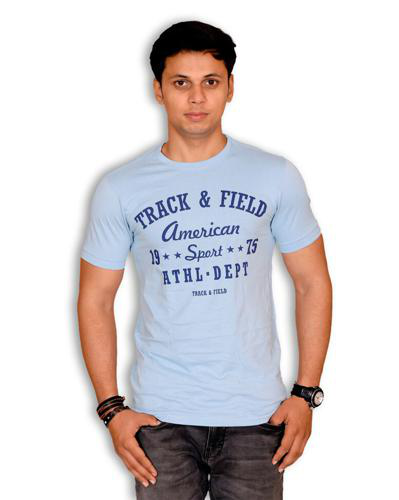

In [89]:
Image.open(aj)

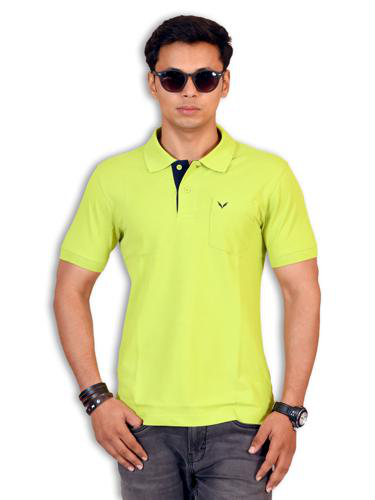

In [90]:
Image.open(ud)

In [92]:
p1 = imagehash.phash(Image.open(ud))
p2 = imagehash.phash(Image.open(aj))
p1

array([[ True,  True,  True, False, False, False,  True,  True],
       [ True, False, False,  True, False,  True,  True, False],
       [False,  True,  True, False, False, False, False,  True],
       [ True, False, False,  True,  True,  True,  True, False],
       [False,  True,  True, False, False,  True, False,  True],
       [ True, False, False,  True,  True, False, False, False],
       [ True,  True, False, False, False,  True,  True,  True],
       [False,  True, False, False,  True, False, False,  True]])

In [1]:
x=imagehash.phash(Image.open(ud))
y=imagehash.phash(Image.open(aj))
x

NameError: name 'imagehash' is not defined

In [158]:
x

array([[ True,  True,  True, False, False, False,  True,  True],
       [ True, False, False,  True, False,  True,  True, False],
       [False,  True,  True, False, False, False, False,  True],
       [ True, False, False,  True,  True,  True,  True, False],
       [False,  True,  True, False, False,  True, False,  True],
       [ True, False, False,  True,  True, False, False, False],
       [ True,  True, False, False, False,  True,  True,  True],
       [False,  True, False, False,  True, False, False,  True]])

In [159]:
y

array([[ True,  True,  True, False, False, False,  True,  True],
       [ True, False, False,  True, False, False,  True,  True],
       [False,  True,  True, False, False, False,  True,  True],
       [ True, False, False,  True,  True, False,  True, False],
       [False,  True,  True, False, False,  True, False,  True],
       [ True, False, False,  True,  True, False, False, False],
       [ True,  True, False, False, False,  True,  True, False],
       [ True,  True, False, False,  True, False, False,  True]])

In [160]:
x-y

6